In [1]:
from graphviz import Digraph
import os
import copy

counter = 1

In [2]:

class State(object):

    def __init__(self, self_state, parent_id, parent_move, level):
        global counter
        self.self_id = counter
        self.self_state = self_state
        self.parent_id = parent_id
        self.parent_move = parent_move
        self.level = level
        self.l_child = -1
        self.u_child = -1
        self.r_child = -1
        self.d_child = -1
        counter += 1

    def set_child(self, state_id, move):
        if move == "left":
            self.l_child = state_id
        elif move == "right":
            self.r_child = state_id
        elif move == "up":
            self.u_child = state_id
        elif move == "down":
            self.d_child = state_id

    def __repr__(self):
        return str(self.self_state[0])+"\n"+str(self.self_state[1])+"\n"+str(self.self_state[2])


In [3]:
def create_child(parent_state, move):
    i = 0
    j = 0
    found = False
    matrix = copy.deepcopy(parent_state)
    for i in range(0, 3):
        for j in range(0, 3):
            if parent_state[i][j] == 0:
                found = True
                break
        if found:
            break
    if move == "left":
        if j == 0:
            return -1
        else:
            matrix[i][j] = matrix[i][j - 1]
            matrix[i][j - 1] = 0
            return matrix
    if move == "right":
        if j == 2:
            return -1
        else:
            matrix[i][j] = matrix[i][j + 1]
            matrix[i][j + 1] = 0
            return matrix
    if move == "up":
        if i == 0:
            return -1
        else:
            matrix[i][j] = matrix[i - 1][j]
            matrix[i - 1][j] = 0
            return matrix

    if move == "down":
        if i == 2:
            return -1
        else:
            matrix[i][j] = matrix[i + 1][j]
            matrix[i + 1][j] = 0
            return matrix

In [4]:
def bfs_search():
    global state_space_tree
    global id_to_state
    parent_state = id_to_state[1]

    dot = Digraph(comment='BFS graph')
    dot.node(str(parent_state.self_id), parent_state.__str__())

    queue = [parent_state]
    while(len(queue) != 0):
        current_state = queue.pop(0)
        if current_state.u_child != -1:
            child_state = id_to_state[current_state.u_child]
            queue.append(child_state)
            # graph
            dot.node(str(child_state.self_id), child_state.__str__())
            dot.edge(str(current_state.self_id), str(child_state.self_id), label="up")
            if child_state.self_state == final_state:
                break
        if current_state.l_child != -1:
            child_state = id_to_state[current_state.l_child]
            queue.append(child_state)
            # graph
            dot.node(str(child_state.self_id), child_state.__str__())
            dot.edge(str(current_state.self_id), str(child_state.self_id), label="left")
            if child_state.self_state == final_state:
                break
        if current_state.d_child != -1:
            child_state = id_to_state[current_state.d_child]
            queue.append(child_state)
            # graph
            dot.node(str(child_state.self_id), child_state.__str__())
            dot.edge(str(current_state.self_id), str(child_state.self_id), label="down")
            if child_state.self_state == final_state:
                break
        if current_state.r_child != -1:
            child_state = id_to_state[current_state.r_child]
            queue.append(child_state)
            # graph
            dot.node(str(child_state.self_id), child_state.__str__())
            dot.edge(str(current_state.self_id), str(child_state.self_id), label="right")
            if child_state.self_state == final_state:
                break

    dot.render(str('/outputs/BFS_graph.gv'), view=True)

In [5]:
initial_state = [[2, 8, 3],
                [1, 6, 4],
                [7, 0, 5]]

In [6]:
final_state = [[1, 2, 3],
                [8, 0, 4],
                [7, 6, 5]]

In [7]:
visited = []

In [8]:
goal_found = False

In [9]:
dot_dfs = Digraph(comment='DFS graph')

In [10]:
def dfs(node):
    global visited
    global dot_dfs
    global goal_found
    if goal_found:
        return
    if node not in visited:
        visited.append(node)

        dot_dfs.node(str(node.self_id), node.__str__())
        dot_dfs.edge(str(node.parent_id), str(node.self_id), label=node.parent_move)

        if node.self_state == final_state:
            goal_found = True
            return
        if node.u_child != -1:
            child_state = id_to_state[node.u_child]
            dfs(child_state)
        if node.l_child != -1:
            child_state = id_to_state[node.l_child]
            dfs(child_state)
        if node.d_child != -1:
            child_state = id_to_state[node.d_child]
            dfs(child_state)
        if node.r_child != -1:
            child_state = id_to_state[node.r_child]
            dfs(child_state)

In [11]:
state_space_tree = dict()
id_to_state = dict()

In [12]:
# global id_to_state
# for graph
dot = Digraph(comment='State space graph')

opposite_movements = {"up": "down", "down": "up", "left": "right", "right": "left"}
goal_found = False
current_state = State(initial_state, 1, "null", 1)
id_to_state[1] = current_state
explore_queue = [current_state.self_id]

dot.node(str(current_state.self_id), current_state.__str__())

goal_lvl = 9999

while (True):
	current_state = id_to_state[explore_queue.pop(0)]

	if current_state.level  > goal_lvl + 1:
		break

	parent_move = current_state.parent_move
	possible_movements = ["up", "left", "down", "right"]
	if (parent_move != "null"):
		possible_movements.remove(opposite_movements[parent_move])
	childs = []
	for move in possible_movements:
		matrix = create_child(current_state.self_state, move)
		if matrix != -1:
			state_obj = State(matrix, current_state.self_id, move, current_state.level+1)
			current_state.set_child(state_obj.self_id, move)
			# put the child id to queue
			explore_queue.append(state_obj.self_id)
			# save the child object
			id_to_state[state_obj.self_id] = state_obj
			childs.append(state_obj.self_id)
			# check if this child is the goal state
			if matrix == final_state and goal_lvl == 9999:
				goal_lvl = state_obj.level - 1

			if matrix == final_state:
				dot.node(str(state_obj.self_id), state_obj.__str__(), color='green')
			else:
				dot.node(str(state_obj.self_id), state_obj.__str__())

			dot.edge(str(state_obj.parent_id), str(state_obj.self_id), label=move)
#dot.render(str('/outputs/state_space_tree.gv'), view=True)

bfs_search()

parent = id_to_state[1]
#dfs(parent)
#dot_dfs.render(str('/outputs/DFS_graph.gv'), view=True)

ExecutableNotFound: failed to execute ['dot', '-Tpdf', '-O', 'BFS_graph.gv'], make sure the Graphviz executables are on your systems' PATH

In [ ]:
matrix

In [3]:
from graphviz import Digraph
dot = Digraph(comment='The Round Table')
dot
dot.node('A', 'King Arthur')
dot.node('B', 'Sir Bedevere the Wise')
dot.node('L', 'Sir Lancelot the Brave')
dot.edges(['AB', 'AL'])
dot.edge('B', 'L', constraint='false')

In [4]:
print(dot.source)

// The Round Table
digraph {
	A [label="King Arthur"]
	B [label="Sir Bedevere the Wise"]
	L [label="Sir Lancelot the Brave"]
	A -> B
	A -> L
	B -> L [constraint=false]
}


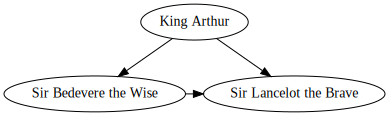

In [10]:
dot

Error: Could not open "round-table.gv.pdf" for writing : Permission denied


CalledProcessError: Command '['dot.bat', '-Tpdf', '-O', 'round-table.gv']' returned non-zero exit status 1. [stderr: b'Error: Could not open "round-table.gv.pdf" for writing : Permission denied\r\n']